In [2]:
from Gaugi import load
from Gaugi.monet.utils import getColor
from Gaugi.tex import *
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from ROOT import TCanvas, TH1F, TH2F, gStyle
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure, kWhite
from pprint import pprint
from functools import reduce
import array
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
SetAtlasStyle()
GeV=1000.
gStyle.SetPalette(kBird)

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence

Applying ATLAS style settings...


In [3]:
etbins = [15, 20, 30, 40, 50, 70]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

In [9]:
path = '/Volumes/castor/cern_data/files/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/'
path+= 'data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et{ET}_eta{ETA}.npz'
paths = [[ path.format(ET=et,ETA=eta) for eta in range(5)] for et in range(5)]

def get_nof( paths ):
    sgn_nof = [[0 for _ in range(5)] for __ in range(5)]
    bkg_nof = [[0 for _ in range(5)] for __ in range(5)]
    for et in range(5):
        for eta in range(5):
            raw = load(paths[et][eta])
            print(paths[et][eta])
            target = raw['target']
            sgn_nof[et][eta] = len( target[target==1])
            bkg_nof[et][eta] = len( target[target!=1])
    return sgn_nof, bkg_nof

sgn_nof, bkg_nof = get_nof(paths)

/Volumes/castor/cern_data/files/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et0_eta0.npz
/Volumes/castor/cern_data/files/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et0_eta1.npz
/Volumes/castor/cern_data/files/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et0_eta2.npz
/Volumes/castor/cern_data/files/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et0_eta3.npz
/Volumes/castor/cern_data/files/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et0_eta4

In [10]:
print(sgn_nof)
print(bkg_nof)

[[232819, 141000, 51566, 227345, 19893], [1499273, 896615, 283647, 1132030, 84054], [4188536, 2539137, 645043, 2377013, 164380], [4627778, 2837736, 470869, 2429079, 187729], [1699541, 1059922, 170752, 901075, 89786]]
[[187639, 143657, 30037, 205792, 15512], [316581, 227709, 47550, 307253, 36522], [223869, 156992, 35206, 196711, 24980], [162421, 112229, 25449, 131668, 16100], [3769656, 2560472, 560953, 1318418, 93785]]


In [13]:
def PlotNofGrid( nof_per_bin , _etbins, _etabins):
    
    print(_etabins)
    canvas = TCanvas('canvas','canvas',1000,500)
    from array import array
    hist = TH2F('','', len(_etbins)-1, array('d',_etbins), len(_etabins)-1, array('d',_etabins))
    for etBinIdx in range(len(_etbins)-1):
        for etaBinIdx in range(len(_etabins)-1):        
            hist.SetBinContent(etBinIdx+1,etaBinIdx+1, nof_per_bin[etBinIdx][etaBinIdx])
    
    canvas.SetRightMargin(0.15)
    canvas.SetTopMargin(0.15)
    hist.GetZaxis().SetTitle('Count')
    canvas.SetLogz()
    #hist.GetXaxis().SetLabelSize(0.13);
    #for etBinIdx in range(len(_etbins)-1):
    #    hist.GetXaxis().SetBinLabel(etBinIdx+1,et_leg[etBinIdx-1])
    #hist.GetXaxis().SetNdivisions(6)
    #hist.GetYaxis().SetNdivisions(4)
    #canvas.SetGrid()
    AddHistogram(canvas,hist, 'colz TEXT',markerSize=2)

    FormatCanvasAxes(canvas, XLabelSize=16, YLabelSize=16, XTitleOffset=0.87, ZLabelSize=16,
                             ZTitleSize=16, YTitleOffset=1.10, ZTitleOffset=1.1)

    SetAxisLabels(canvas,'E_{T}', '|\eta|')
    return canvas

[0.0, 0.8, 1.37, 1.54, 2.37, 2.5]


Info in <TCanvas::Print>: pdf file data17_zee_nof_per_bin.pdf has been created


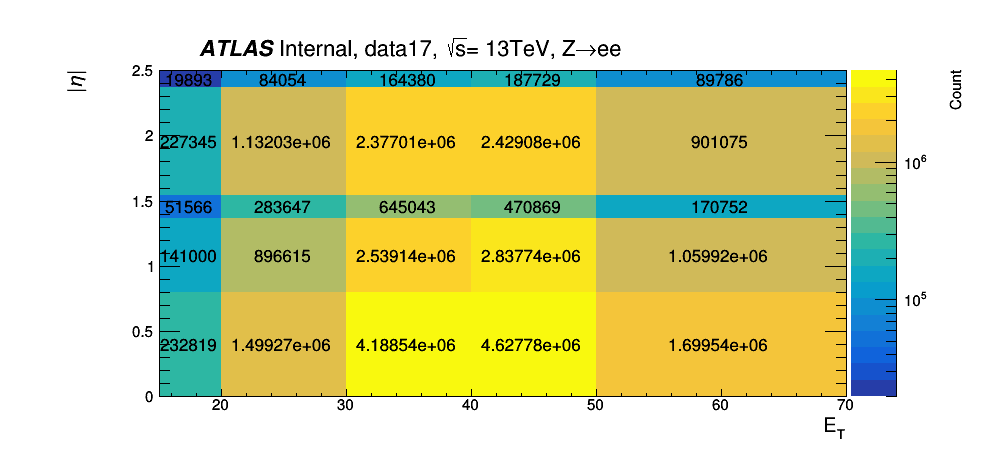

In [14]:
canvas = PlotNofGrid(sgn_nof, etbins, etabins)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, data17, #sqrt{s}= 13TeV, Z#rightarrowee')
canvas.Draw()
canvas.SaveAs('data17_zee_nof_per_bin.pdf')

[0.0, 0.8, 1.37, 1.54, 2.37, 2.5]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file data17_jets_nof_per_bin.pdf has been created


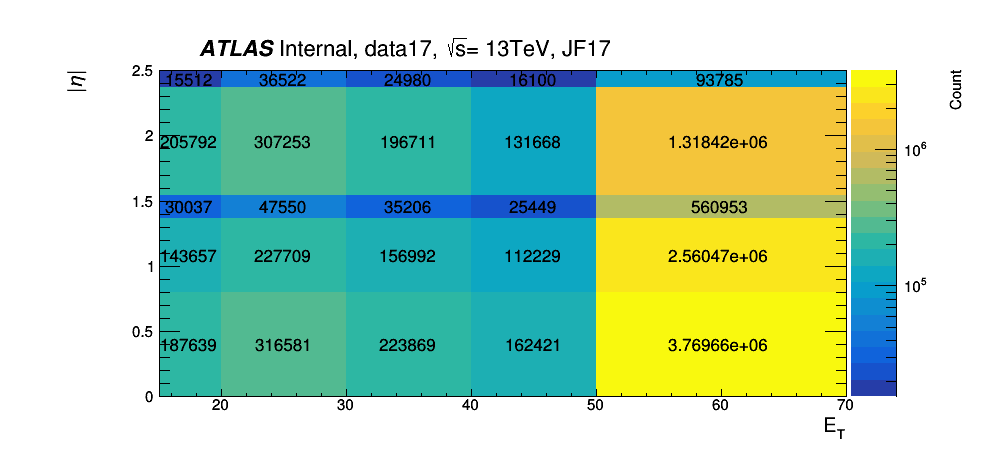

In [15]:
canvas = PlotNofGrid(bkg_nof, etbins, etabins)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, data17, #sqrt{s}= 13TeV, JF17')
#AddLegend( canvas,0.2,0.53, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
canvas.Draw()
canvas.SaveAs('data17_jets_nof_per_bin.pdf')

In [16]:
def make_table(nof_signal, nof_background, etbins, etabins, title, output):
    
    etbins_str = []; etabins_str = []
    for etBinIdx in range(len(etbins)-1):
        etbin = (etbins[etBinIdx], etbins[etBinIdx+1])
        if etbin[1] > 60 :
            etbins_str.append( r'$E_{T}\text{[GeV]} > %d$' % etbin[0])
        else:
            etbins_str.append(  r'$%d < E_{T} <%d$'%etbin )

    # Create Latex eta bins
    for etaBinIdx in range( len(etabins)-1 ):
        etabin = (etabins[etaBinIdx], etabins[etaBinIdx+1])
        etabins_str.append( r'$%.2f<\eta<%.2f$'%etabin )
    
    green = '\cellcolor[HTML]{9AFF99}'

    with BeamerTexReportTemplate1( theme = 'Berlin'
                                 , _toPDF = True
                                 , title = title
                                 , outputFile = output
                                 , font = 'structurebold' ):
        
        lines1 = []
        lines1 += [ HLine(_contextManaged = False) ]
        lines1 += [ HLine(_contextManaged = False) ]
        lines1 += [ TableLine( columns = [''] + reduce(lambda x,y: x+y,[[s] for s in etbins_str]), _contextManaged = False ) ]
        #lines1 += [ HLine(_contextManaged = False) ]
        #lines1 += [ TableLine( columns = ['',''] + reduce(lambda x,y: x+y,[['Units'] for _ in etbins_str]), _contextManaged = False ) ]
        lines1 += [ HLine(_contextManaged = False) ]
        
        names = ['Signal', 'Background']
        for etaBinIdx in range(len(etabins)-1):
            for idx, name in enumerate( names ):
                values = []
                for etBinIdx in range(len(etbins)-1):
                    if idx==0:
                        n= '\\textcolor{blue}{'+str(nof_signal[etBinIdx][etaBinIdx])+'}'
                    else:
                        n= '\\textcolor{red}{'+str(nof_background[etBinIdx][etaBinIdx])+'}'
                    values.append( n )   
                if idx > 0:
                    lines1 += [ TableLine( columns = [''] + values   , _contextManaged = False ) ]
                else:
                    lines1 += [ TableLine( columns = ['\multirow{%d}{*}{'%(len(names))+etabins_str[etaBinIdx]+'}'] + values   ,
                                                _contextManaged = False ) ]                    
            lines1 += [ HLine(_contextManaged = False) ]
        lines1 += [ HLine(_contextManaged = False) ]
        
        # Create all tables into the PDF Latex
        with BeamerSlide( title = "Number of events."  ):
            with Table( caption = "Number of events.") as table:
                with ResizeBox( size = 1. ) as rb:
                    with Tabular( columns = 'lc' + 'c' * len(etbins_str) ) as tabular:
                        tabular = tabular
                        for line in lines1:
                            if isinstance(line, TableLine):
                                tabular += line
                            else:
                                TableLine(line, rounding = None)
        
make_table(sgn_nof, bkg_nof, etbins, etabins, 'test', 'test')

2021-02-15 09:54:31,004 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file test.pdf latex code...
